# 프로젝트명 : 1주차 제조데이터 실습코드

### 📌 프로젝트 소개

- 제품 및 공장의 불량률을 나타내는 제조 데이터는 민감한 정보이므로 기업이 공개적으로 공유하지 않는 경우가 많습니다.
- 그럼에도 불구하고 제조 공정의 불량률을 줄이거나 개선하는 데 도움이 될 수 있으므로 중요한 데이터입니다.
- 실제로 현장에서의 목표는 일반적인 데이터 분석처럼 단순히 고성능 예측 모델을 개발하는 것이 아닙니다. 대신 `어떤 요인이 결함에 영향을 미치는지 이해하고 이를 줄이기 위한 효과적인 전략을 결정`하는 데 중점을 둡니다.
- 따라서 데이터 분석가의 임무는 `다양한 데이터를 분석하고 제품 불량 발생률을 줄일 수 있는 솔루션을 제공`하는 것입니다.


### ✅ 데이터 안내
- 본 실습에 사용된 데이터는 실제 제조과정에서 나온 데이터로 익명처리되어 어느 회사의 제품인지 식별이 불가능합니다.
- 제조업 데이터를 다루다 보면 제조업 분야에서 흔히 발생하는 `데이터 불균형`을 자주 접하게 됩니다.
- 비식별화된 제조 데이터에서 `종속변수 Y`는 `제품의 불량 여부`를 나타냅니다.
- X로 표시된 나머지 변수는 독립변수입니다.
|


![워크플로우](https://file.notion.so/f/f/4e4750b9-2973-47f2-9fe5-8330ce1f2c19/475398a6-c3b8-4335-aa31-21706433bb30/%E1%84%91%E1%85%B3%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%8B%E1%85%AF%E1%84%8F%E1%85%B3.png?id=394533fb-064a-49a7-b2a8-8ef44889237d&table=block&spaceId=4e4750b9-2973-47f2-9fe5-8330ce1f2c19&expirationTimestamp=1715745600000&signature=6FQpuNkoG-UJfp-FiIfFnwlPC7A7iDe-0RR1PbO-ixg&downloadName=%E1%84%91%E1%85%B3%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%8B%E1%85%AF%E1%84%8F%E1%85%B3.png)

In [10]:
import pandas as pd
import numpy as np
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\USER\\projects\\bae\\실습자료\\1주_실습데이터.csv')
print(data.head())

         X1        X2        X3        X4        X5        X6        X7  \
0  0.202296  0.003560  0.411261  0.015348  0.693147  0.036360  0.343512   
1  0.006836  0.007688  0.597304  0.015348  0.686838  0.067407  0.347869   
2  0.609621  0.001461  0.466186  0.015348  0.693090  0.018944  0.345032   
3  0.074007  0.003072  0.535876  0.015348  0.693147  0.031475  0.347502   
4  0.198356  0.007020  0.416238  0.015348  0.686838  0.061888  0.347441   

         X8        X9       X10  ...       X12       X13       X14       X15  \
0  0.028087  0.681974  0.295769  ...  0.682731  0.249262  0.681974  0.016330   
1  0.028640  0.497403  0.297943  ...  0.680891  0.249262  0.497403  0.670040   
2  0.024502  0.647685  0.298255  ...  0.685525  0.249262  0.647685  0.648486   
3  0.025393  0.587787  0.296057  ...  0.677980  0.249262  0.575364  0.632563   
4  0.028450  0.537143  0.298167  ...  0.673286  0.249262  0.537143  0.671124   

        X16       X17       X18       X19       X20  Y  
0  0.242926

In [6]:
from collections import Counter

# 모든 열에 대한 이상치 탐지 함수 정의
def detect_outliers(df, features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        # 이상치를 포함하는 행의 인덱스 찾기
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

# 모든 독립변수에 대해 이상치 탐지
outliers_to_drop = detect_outliers(data, data.columns[:-1])
print("이상치를 포함하는 행 수:", len(outliers_to_drop))

이상치를 포함하는 행 수: 64213


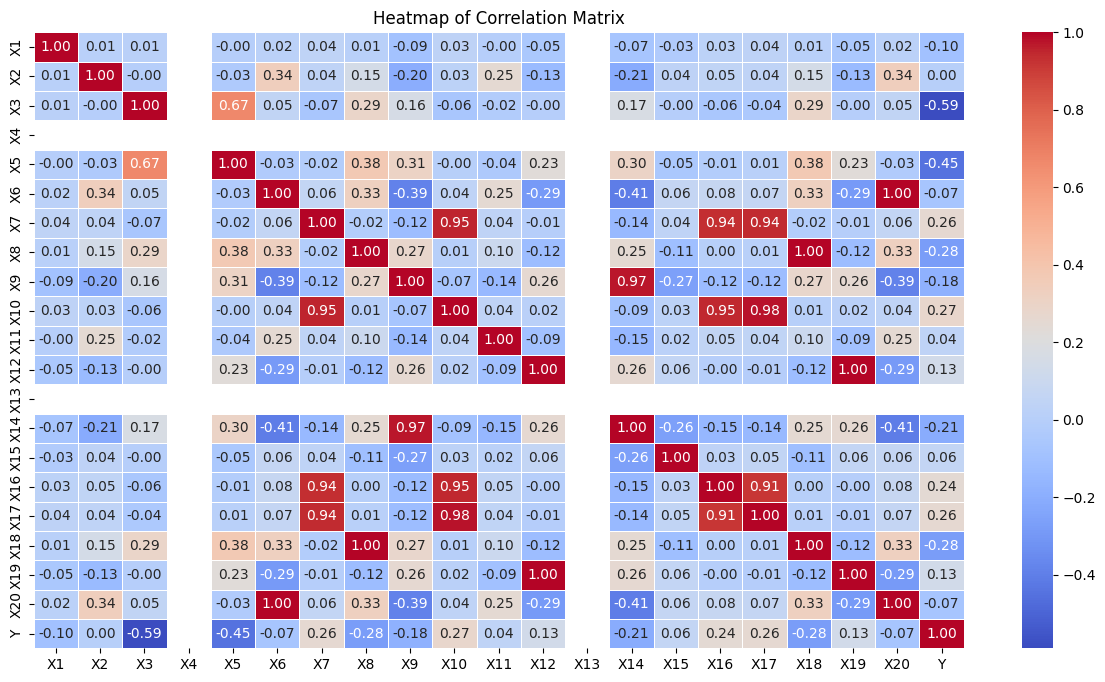

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터의 상관관계 계산
correlation = data.corr()

# 히트맵 생성
plt.figure(figsize=(15, 8))  # 히트맵 크기 설정
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white',fmt='.2f')
plt.title('Heatmap of Correlation Matrix')  # 히트맵 제목 설정
plt.show()

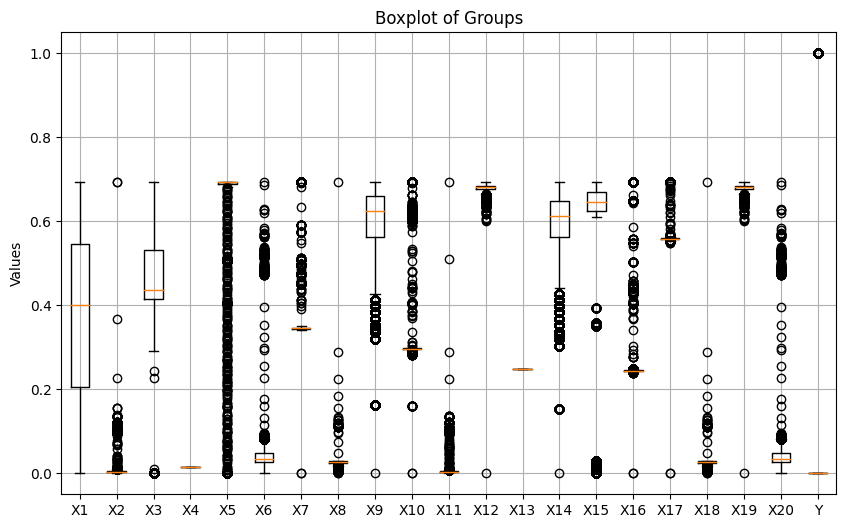

In [15]:
# 박스플롯 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.boxplot(data.values, labels=data.columns)  # 데이터와 라벨 지정
plt.title('Boxplot of Groups')  # 그래프 제목 설정
plt.ylabel('Values')  # y축 라벨 설정
plt.grid(True)  # 그리드 표시
plt.show()  # 그래프 표시

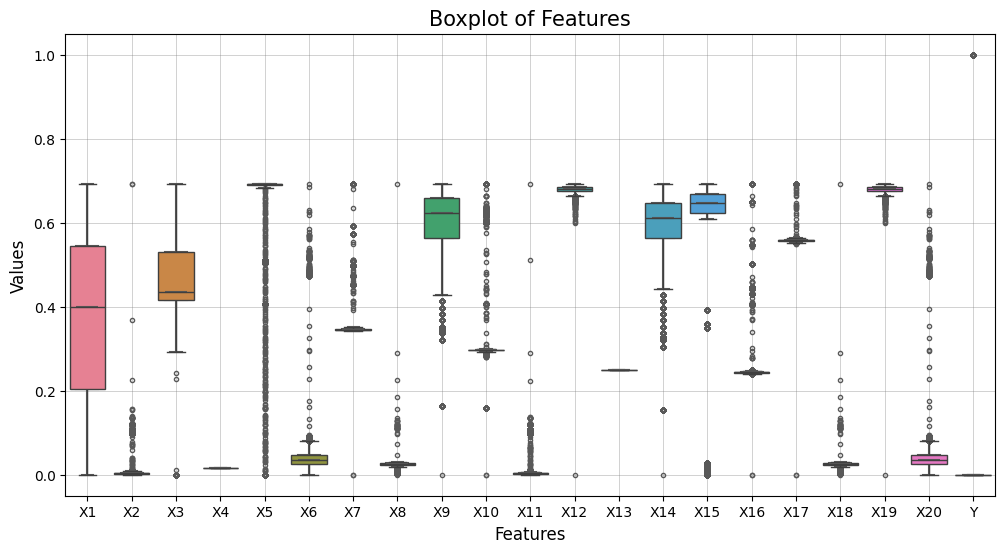

In [16]:
# 박스플롯 생성
plt.figure(figsize=(12, 6))  # 적절한 크기 설정
sns.boxplot(data=data, palette="Set2", width=0.5, fliersize=3, linewidth=1.5)

# 이상치 표시 방법 변경
sns.boxplot(data=data, showfliers=False)  # 이상치 미표시

# 축 라벨, 제목 설정
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Boxplot of Features', fontsize=15)

# 그리드 간소화
plt.grid(True, linestyle='-', linewidth='0.5', color='gray', alpha=0.5)

# 표시
plt.show()

In [17]:
# X15에 대한 이상치 탐지 함수 정의
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 데이터 반환
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# X15의 이상치 추출
x15_outliers = find_outliers(data, 'X15')

# 이상치 출력
print("X15의 이상치:")
print(x15_outliers)

X15의 이상치:
              X1        X2        X3        X4        X5        X6        X7  \
0       0.202296  0.003560  0.411261  0.015348  0.693147  0.036360  0.343512   
34      0.427397  0.004082  0.551825  0.015348  0.693147  0.040126  0.343538   
45      0.268562  0.003524  0.462827  0.015348  0.693147  0.035607  0.343037   
54      0.177830  0.003300  0.469604  0.015348  0.693147  0.033349  0.343113   
56      0.041750  0.003604  0.430614  0.015348  0.693147  0.036109  0.343614   
...          ...       ...       ...       ...       ...       ...       ...   
525957  0.582120  0.011029  0.419047  0.015348  0.504250  0.088577  0.348815   
526143  0.582120  0.011252  0.414582  0.015348  0.504250  0.088869  0.680634   
526293  0.645533  0.004285  0.412369  0.015348  0.693147  0.036929  0.343691   
526330  0.332805  0.012137  0.413006  0.015348  0.504250  0.091838  0.693039   
526856  0.635570  0.007044  0.404084  0.015348  0.510595  0.057310  0.345606   

              X8        X9   

In [18]:
# X15 열의 기술적 통계 출력
print(data['X15'].describe())

count    527000.000000
mean          0.603826
std           0.165551
min           0.000000
25%           0.623615
50%           0.645785
75%           0.668555
max           0.693147
Name: X15, dtype: float64


In [19]:
# X15 열의 고유값 및 그 빈도 출력
print(data['X15'].value_counts())


0.613330    17198
0.616268     4988
0.637721     4127
0.658006     3909
0.644881     3824
            ...  
0.028254       10
0.023108        9
0.022974        9
0.027066        9
0.000930        6
Name: X15, Length: 11619, dtype: int64


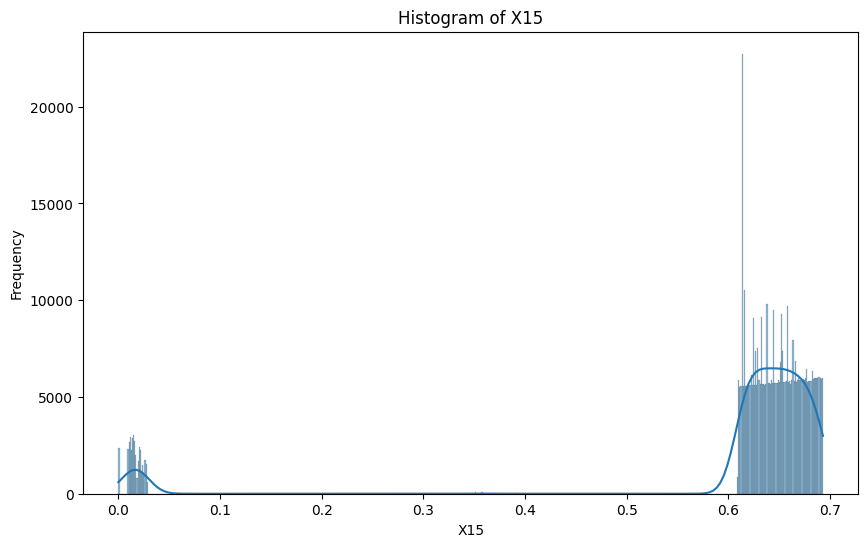

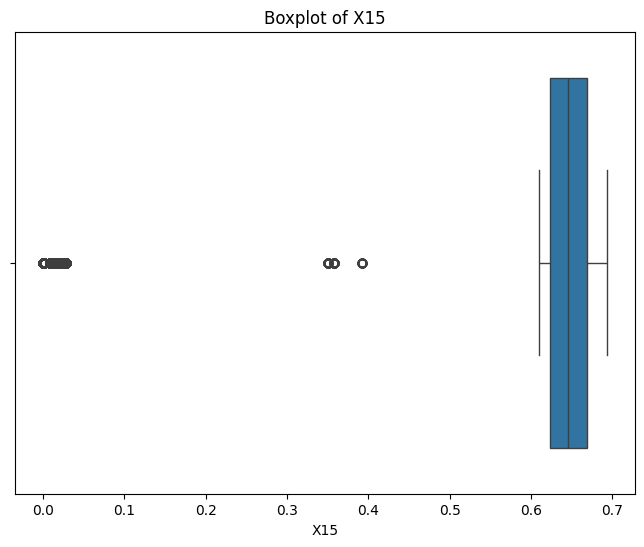

In [20]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data['X15'], kde=True)
plt.title('Histogram of X15')
plt.xlabel('X15')
plt.ylabel('Frequency')
plt.show()

# 박스플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['X15'])
plt.title('Boxplot of X15')
plt.show()

In [21]:
def summarize_x15_by_y(df, x15_column, y_column):
    # Y가 0인 경우
    y_equals_0 = df[df[y_column] == 0]
    counts_y0 = y_equals_0[x15_column].value_counts()
    values_y0 = y_equals_0[x15_column].unique()
    
    # Y가 1인 경우
    y_equals_1 = df[df[y_column] == 1]
    counts_y1 = y_equals_1[x15_column].value_counts()
    values_y1 = y_equals_1[x15_column].unique()
    
    # 결과 출력
    print("When Y=0:")
    print("Values of X15:", values_y0)
    print("Counts of X15:", counts_y0)
    print("\nWhen Y=1:")
    print("Values of X15:", values_y1)
    print("Counts of X15:", counts_y1)

    # 결과 반환 (옵션에 따라 반환값을 다르게 설정할 수 있습니다)
    return (values_y0, counts_y0, values_y1, counts_y1)

# 함수 사용 예시
summarize_x15_by_y(data, 'X15', 'Y')

When Y=0:
Values of X15: [0.01633042 0.6700395  0.6484856  ... 0.02632325 0.02227243 0.01697572]
Counts of X15: 0.629096    117
0.013700     80
0.614882     80
0.021645     80
0.635614     80
           ... 
0.018025     10
0.027066      9
0.022974      9
0.023108      9
0.000930      6
Name: X15, Length: 11619, dtype: int64

When Y=1:
Values of X15: [0.644881   0.6377214  0.6133302  0.6580057  0.6529195  0.0200614
 0.6288436  0.6295919  0.66564965 0.6322226  0.6695631  0.66407996
 0.6246528  0.6162676  0.62305015 0.6623898  0.6274921  0.67689466
 0.65177506 0.6299252  0.629917   0.6537055  0.60975397 0.35786062
 0.6826012  0.61020994 0.6732045  0.6422032  0.6762741  0.6494345
 0.6208627  0.6864106  0.39243585 0.6780881  0.64219517 0.6450892
 0.35049888 0.6794813  0.02803099 0.01687069 0.6737958  0.6755134
 0.68591887 0.6905115  0.02586241 0.668375   0.6908404  0.01116804
 0.63881755 0.6735391  0.6815983  0.01320306 0.         0.02826836
 0.6296    ]
Counts of X15: 0.613330    17158
0.

(array([0.01633042, 0.6700395 , 0.6484856 , ..., 0.02632325, 0.02227243,
        0.01697572]),
 0.629096    117
 0.013700     80
 0.614882     80
 0.021645     80
 0.635614     80
            ... 
 0.018025     10
 0.027066      9
 0.022974      9
 0.023108      9
 0.000930      6
 Name: X15, Length: 11619, dtype: int64,
 array([0.644881  , 0.6377214 , 0.6133302 , 0.6580057 , 0.6529195 ,
        0.0200614 , 0.6288436 , 0.6295919 , 0.66564965, 0.6322226 ,
        0.6695631 , 0.66407996, 0.6246528 , 0.6162676 , 0.62305015,
        0.6623898 , 0.6274921 , 0.67689466, 0.65177506, 0.6299252 ,
        0.629917  , 0.6537055 , 0.60975397, 0.35786062, 0.6826012 ,
        0.61020994, 0.6732045 , 0.6422032 , 0.6762741 , 0.6494345 ,
        0.6208627 , 0.6864106 , 0.39243585, 0.6780881 , 0.64219517,
        0.6450892 , 0.35049888, 0.6794813 , 0.02803099, 0.01687069,
        0.6737958 , 0.6755134 , 0.68591887, 0.6905115 , 0.02586241,
        0.668375  , 0.6908404 , 0.01116804, 0.63881755, 0.6735391

In [22]:
def count_x15_by_y(df, x15_column, y_column):
    # Y가 0인 경우의 X15 개수
    count_y0 = df[df[y_column] == 0][x15_column].count()
    
    # Y가 1인 경우의 X15 개수
    count_y1 = df[df[y_column] == 1][x15_column].count()
    
    # 결과 출력
    print(f"Total count of {x15_column} when {y_column}=0: {count_y0}")
    print(f"Total count of {x15_column} when {y_column}=1: {count_y1}")

    # 결과 반환
    return count_y0, count_y1
# 함수 사용 예시
count_y0, count_y1 = count_x15_by_y(data, 'X15', 'Y')

Total count of X15 when Y=0: 470000
Total count of X15 when Y=1: 57000


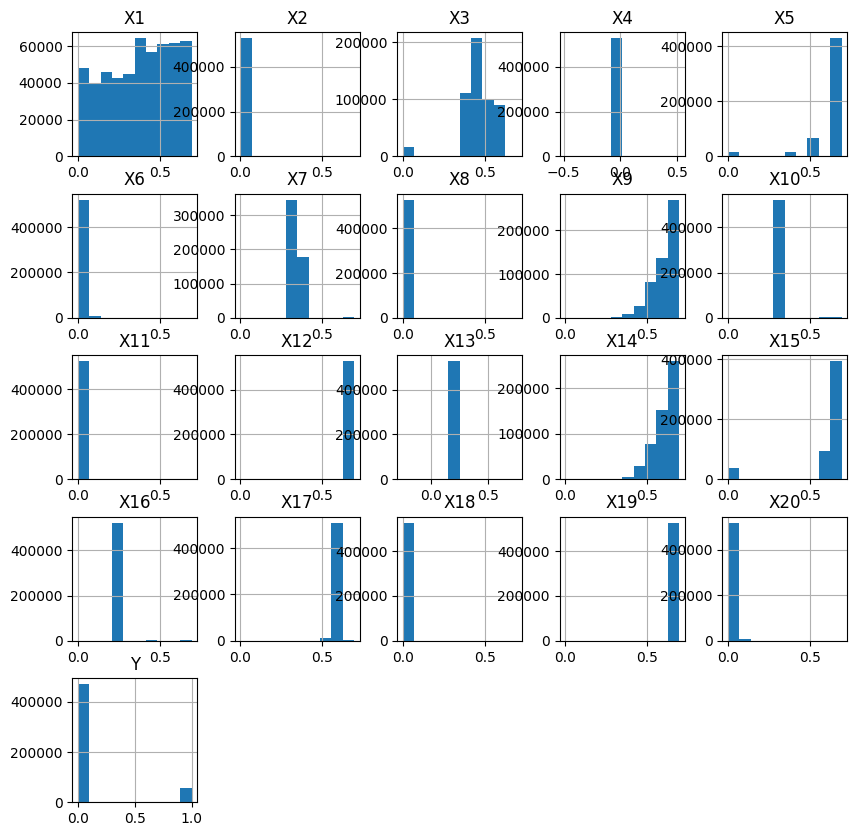

In [23]:
# 히스토그램으로 변수 분포 확인
data.hist(figsize=(10, 10))
plt.show()